In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

# Classification

see dataset description at: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

load a dataset

In [2]:
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print d.shape
d.head()

(1372, 5)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


first inspection of data and binary relationships.

- are variables normal?
- what relations do you see?

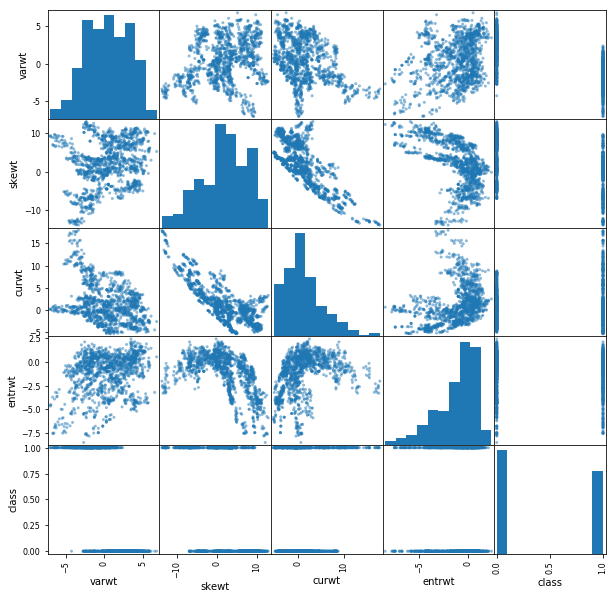

In [3]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

now split data: input columns and colum to be predicted

In [4]:
X = d.values[:,:-1]
y = d.values[:,-1]

now create an estimator, train and predict

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()

est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:100]
print "first 100 targets    ", y[:100]


first 100 predictions [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.]
first 100 targets     [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


accuracy of predicions

In [6]:
print "%.3f"%accuracy_score(predictions, y)

0.841


but wait! we are cheating!! cannot use same data for training and for test. let's use the first half for training and the rest for test

In [7]:
n = len(X)/2
est.fit(X[:n], y[:n])
print "%.3f"%accuracy_score(est.predict(X[n:]), y[n:])

0.111


what happened?!?!?

In [8]:
print "first 100", y[:100]
print "last  100", y[-100:]
print "class distribution", [(i, sum(y==i)) for i in np.unique(y)]

first 100 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
last  100 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
class distribution [(0.0, 762), (1.0, 610)]


data is not shuffled, we are training only with one class. understand next chart and how it is built

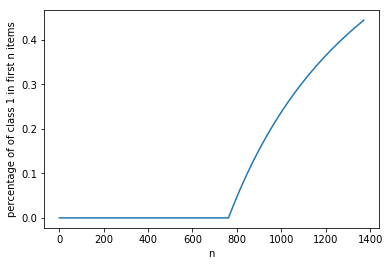

In [9]:
t = range(1,len(y))
p = [np.mean(y[:i]) for i in t]
plt.plot(t,p)
plt.ylabel("percentage of of class 1 in first n items")
plt.xlabel("n")

let's use cross validation and build more confidence in our results

In [10]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

[ 0.84782609  0.86231884  0.87591241  0.82481752  0.74452555  0.86131387
  0.83211679  0.86861314  0.77372263  0.89781022]
accuracy 0.839 (+/- 0.04500)


let's understand better how this estimator is performing.

- TPR: true positive rate
- TNR: true negative rate

In [11]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [12]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

tpr 0.794 (+/- 0.04709)
tnr 0.878 (+/- 0.03317)


we now use other estimators. observe the all follow sklearn API

In [13]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.982 (+/- 0.01189)
tpr      0.980 (+/- 0.02101)
tnr      0.985 (+/- 0.01092)


In [14]:
est.fit(X,y)
est.feature_importances_

array([ 0.58292763,  0.23777054,  0.15739411,  0.02190771])

In [15]:
X = d.values[:,:-1]
y = d.values[:,-1]

X = d.values[:,:-3]
y = d.values[:,-1]

from sklearn.svm import SVC
est = SVC()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.937 (+/- 0.01579)
tpr      0.957 (+/- 0.03142)
tnr      0.917 (+/- 0.04088)


# Regression

see dataset description: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [16]:
d = pd.read_csv("data/airfoil_self_noise.dat.gz")
print d.shape
d.head()

(1503, 6)


,freq,angle,chord,vel,suc,pres
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


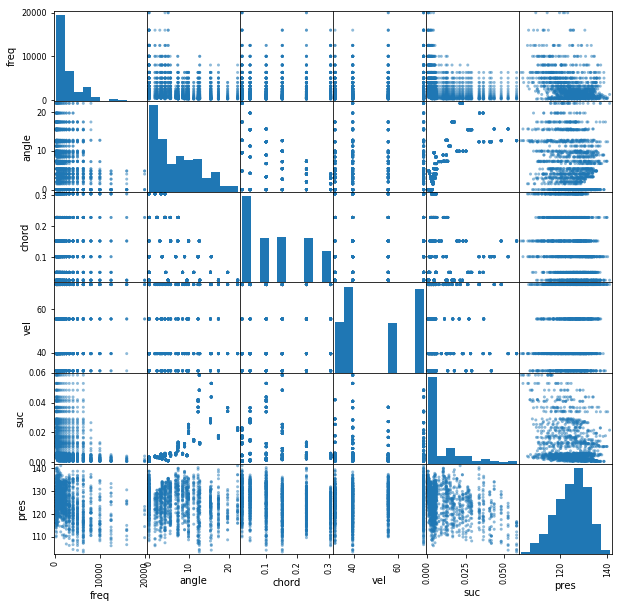

In [17]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

same workflow, observe performance metric must be different for regression. is result acceptable??

In [18]:
X = d.values[:,:-1]
y = d.values[:,-1]

In [19]:
from sklearn.tree import DecisionTreeRegressor
est = DecisionTreeRegressor()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 6.092 (+/- 1.75762)


In [20]:
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 43.363 (+/- 4.14734)


let's see SVR result more in detail. observe that whe training with less data performace drops. will use permutations to take a random half.

In [21]:
n = len(d)/2
est = SVR()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print "MSE %.3f"% mean_squared_error(yts, est.predict(Xts))

MSE 44.190


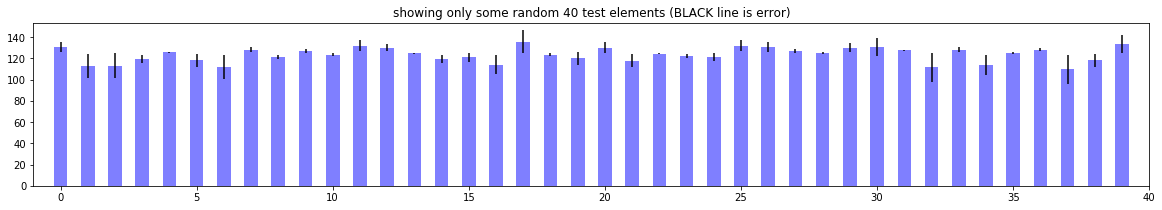

In [22]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

finally, let's see the effect of increasing data

In [23]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 3 4 5 6 7 8 9 10


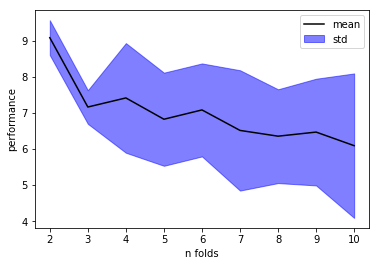

In [24]:
show_curve(DecisionTreeRegressor())

2 3 4 5 6 7 8 9 10


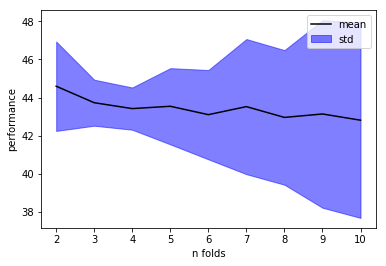

In [25]:
show_curve(SVR())


2 3 4 5 6 7 8 9 10


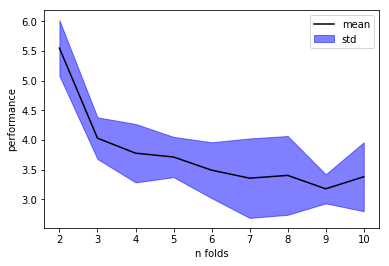

In [26]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())